In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

ModuleNotFoundError: No module named 'pmdarima'

In [116]:
data = pd.read_csv('/home/ifire/test_2/Aquaculture-Project-/Pretreated data.csv')
data.head()

,date,Temp(degC),Air_temp(degC),Salinity(PSU),pH,DO(mg/l),precipitation(mm)
0,2020-01-01 00:00:00,25.619,27.762,34.046,8.3158,8.1548,0.00102
1,2020-01-01 00:05:00,25.623,27.810,34.084,8.3184,8.1587,0.00102
2,2020-01-01 00:10:00,25.625,27.819,34.105,8.3198,8.1589,0.00102
3,2020-01-01 00:15:00,25.623,27.768,34.098,8.3190,8.1536,0.00102
4,2020-01-01 00:20:00,25.619,27.686,34.084,8.3169,8.1450,0.00102


Text(0.5, 1.0, 'pH Fluctuation')

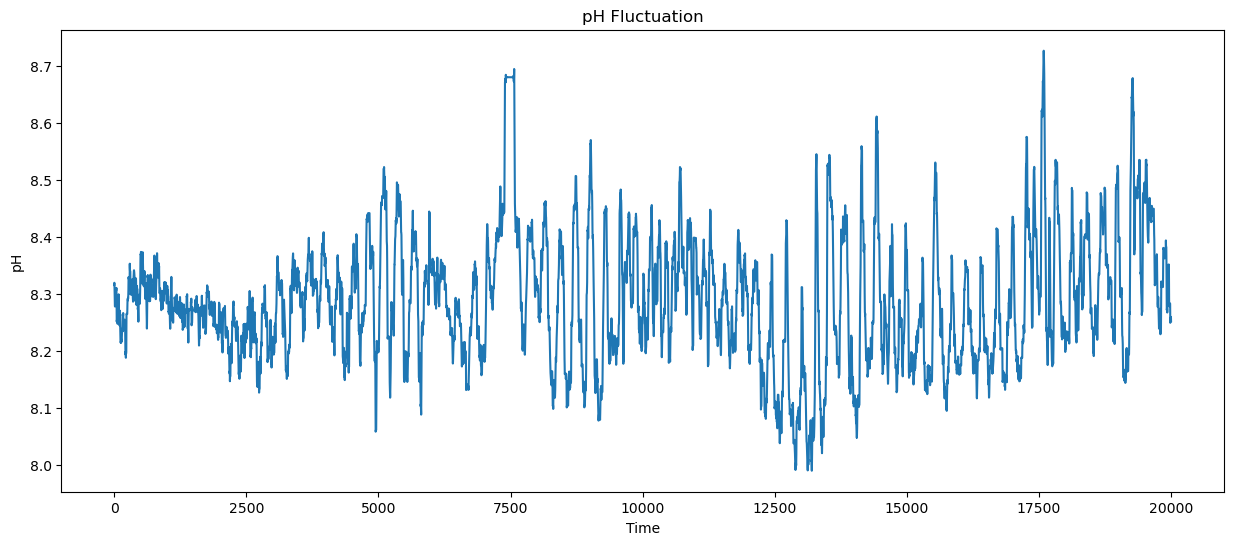

In [117]:
plt.figure(figsize=(15,6))
plt.plot(data['pH'])
plt.xlabel('Time')
plt.ylabel('pH')
plt.title('pH Fluctuation')

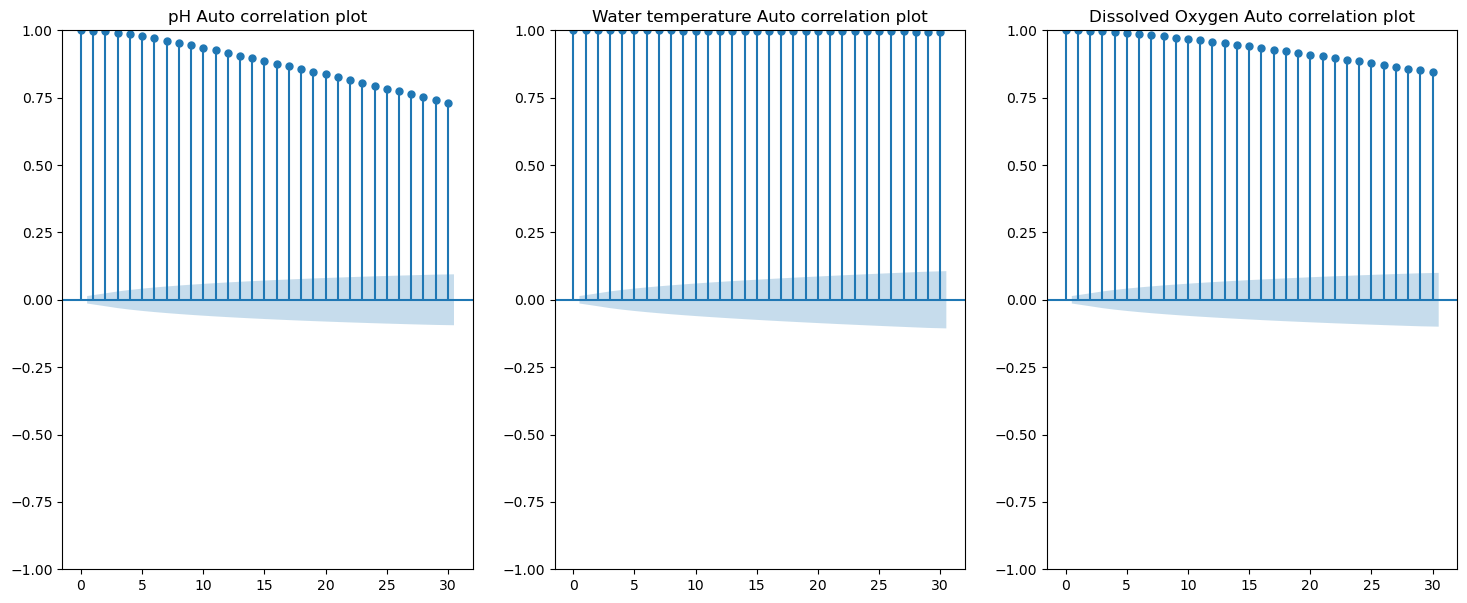

In [118]:
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sm.graphics.tsa.plot_acf(data['pH'], title='pH Auto correlation plot', lags=30,  ax=ax[0])
sm.graphics.tsa.plot_acf(data['Temp(degC)'], title='Water temperature Auto correlation plot', lags=30,  ax=ax[1])
sm.graphics.tsa.plot_acf(data['DO(mg/l)'], title='Dissolved Oxygen Auto correlation plot', lags=30,  ax=ax[2])
plt.show()

The ACF plot in all the data has a slow declining trend which suggest that there is a trend in all the data. 
That mean the data is not stationary there for before modelling we have to dtrend that.

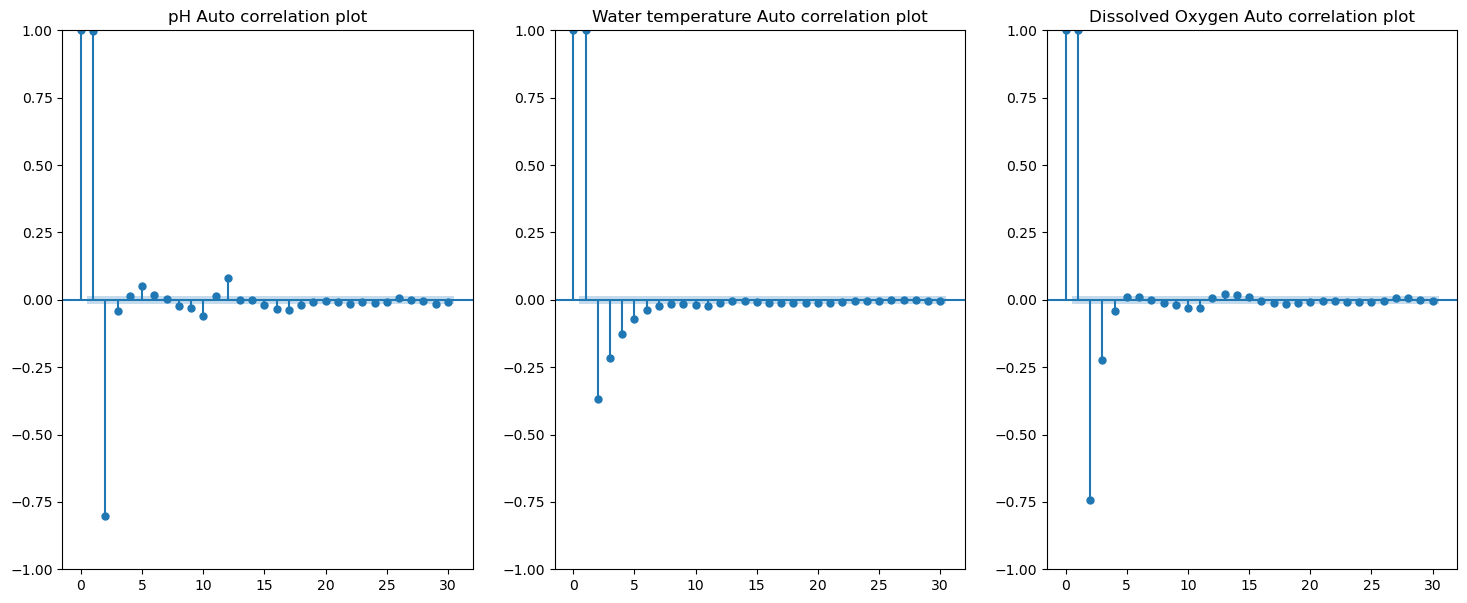

In [119]:
## PACF plot
fig, ax = plt.subplots(1, 3, figsize=(18, 7))
sm.graphics.tsa.plot_pacf(data['pH'], title='pH Auto correlation plot', lags=30,  ax=ax[0])
sm.graphics.tsa.plot_pacf(
    data['Temp(degC)'], title='Water temperature Auto correlation plot', lags=30,  ax=ax[1]
)
sm.graphics.tsa.plot_pacf(
    data['DO(mg/l)'], title='Dissolved Oxygen Auto correlation plot', lags=30,  ax=ax[2]
)
plt.show()

The 3, 12 lags are significant in the ph

lags upto 5 are significant in water temprature

lags upto 5 are significant in DO

### PACF decide the AR terms of the ARMA model and ACF decide the MA terms of the model

In [120]:
ph = data[['date', 'pH']]
ph = ph.set_index('date')
ph.head()

,pH
date,
2020-01-01 00:00:00,8.3158
2020-01-01 00:05:00,8.3184
2020-01-01 00:10:00,8.3198
2020-01-01 00:15:00,8.3190
2020-01-01 00:20:00,8.3169


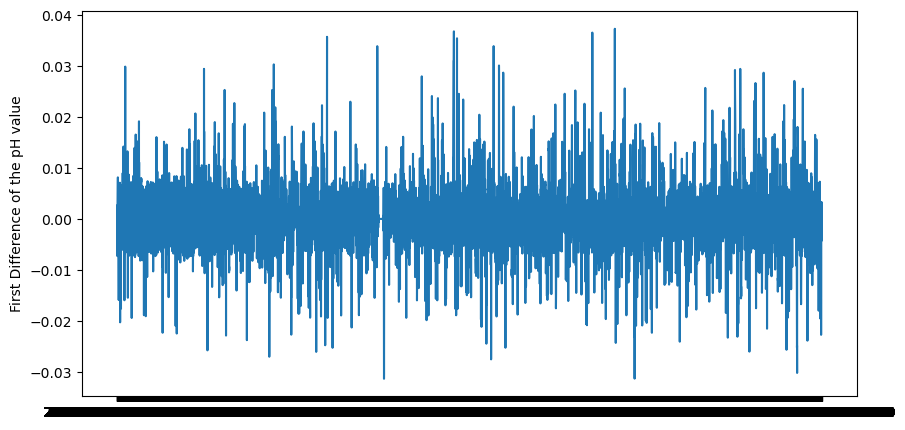

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(ph.diff().dropna())
plt.ylabel("First Difference of the pH value")
plt.show()

from the above plot the variance of the model seems to be accurate 

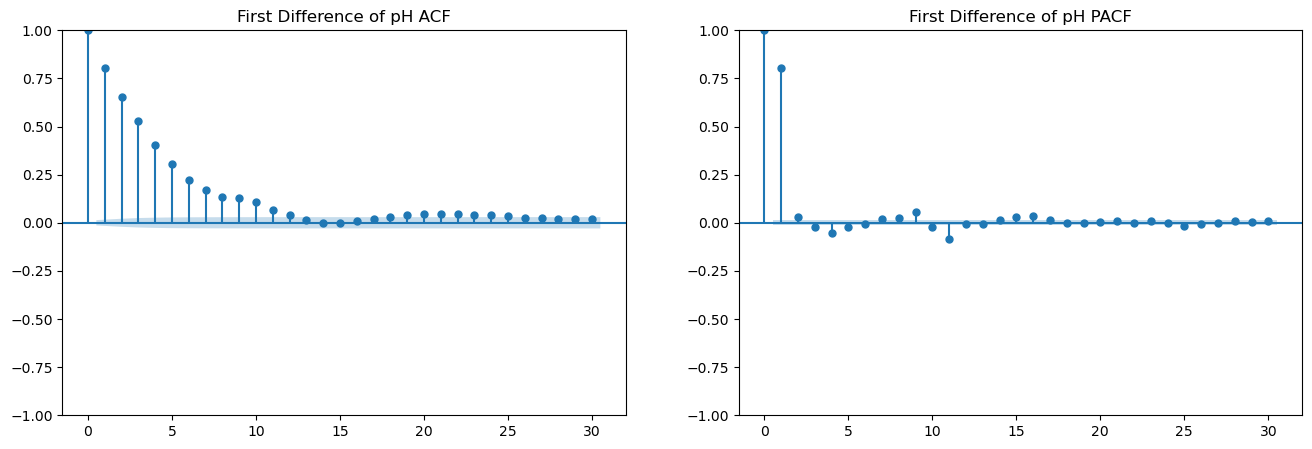

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(
    ph.diff().dropna(),
    title="First Difference of pH ACF",
    lags=30,
    ax=ax1,
)
sm.graphics.tsa.plot_pacf(
    ph.diff().dropna(),
    title="First Difference of pH PACF",
    lags=30,
    ax=ax2,
)
plt.show()

In [123]:
## ARIMA model selection 
mod_can_auto = auto_arima(
    np.log(ph).dropna(),  # stepwise=False,
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=7,
    max_d=7,
    max_q=7,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-235903.413, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-256485.718, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-246372.993, Time=0.88 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-256503.310, Time=0.99 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-256509.324, Time=1.75 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-256566.130, Time=2.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-256574.489, Time=3.93 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=-256573.886, Time=4.56 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-256566.559, Time=1.80 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-256548.952, Time=1.54 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=-256568.435, Time=1.88 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-256572.491, Time=6.42 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]          
Total fit time: 27.103 seconds


In [129]:
mod_can_a = SARIMAX(
    np.log(ph), order=(5, 1, 0), trend="c"
).fit()  # This is the best model in Python implementation
print(mod_can_a.summary())

/home/ifire/miniconda3/envs/ITS_paper/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/home/ifire/miniconda3/envs/ITS_paper/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.41466D+00    |proj g|=  6.16330D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     35      1     0     0   6.144D+01  -6.415D+00
  F =  -6.4146622868753775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


                               SARIMAX Results                                
Dep. Variable:                     pH   No. Observations:                20000
Model:               SARIMAX(5, 1, 0)   Log Likelihood              128293.246
Date:                Thu, 10 Oct 2024   AIC                        -256572.491
Time:                        04:07:58   BIC                        -256517.167
Sample:                    01-01-2020   HQIC                       -256554.391
                         - 03-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.804e-08   2.81e-06     -0.031      0.975   -5.59e-06    5.42e-06
ar.L1          0.7749      0.004    214.994      0.000       0.768       0.782
ar.L2          0.0499      0.007      6.837      0.0

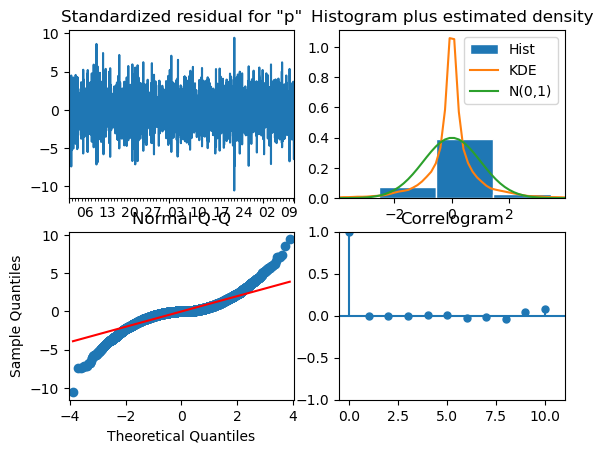

In [130]:
mod_can_a.plot_diagnostics()
plt.show()

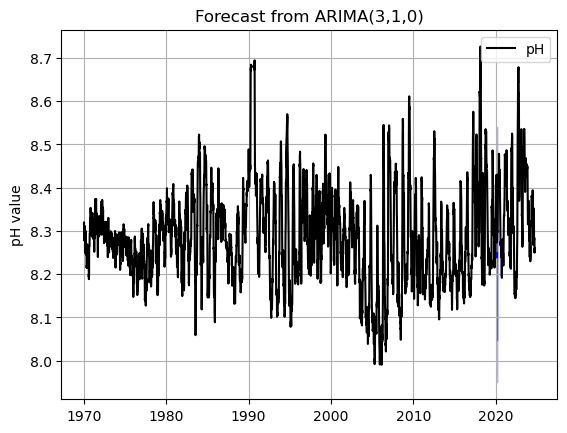

In [131]:
## forecasting part

ffx = ph.copy()
ffx.index = [i for i in range(len(ffx))]  # Set numeric index
ffx.plot(ylabel="pH value", title="Forecast from ARIMA(3,1,0)", color="k")
# get forecast data for next 100 steps
forecast = mod_can_a.get_forecast(steps=100)
forecast_mean = np.exp(forecast.predicted_mean)  # mean of forecast data
conf_int95 = forecast.conf_int(alpha=0.05)  # 95% confidence interval
conf_int80 = forecast.conf_int(alpha=0.2)  # 80% confidence interval

# plot mean forecast and 95% and 80% confidence intervals
plt.plot(forecast_mean, c="b")
plt.fill_between(
    conf_int95.index,
    np.exp(conf_int95["lower pH"]),
    np.exp(conf_int95["upper pH"]),
    color="b",
    alpha=0.3,
)
plt.fill_between(
    conf_int80.index,
    np.exp(conf_int80["lower pH"]),
    np.exp(conf_int80["upper pH"]),
    color="b",
    alpha=0.5,
)
plt.grid()
plt.show()

In [132]:
ffx = ph.copy()
ffx.index = range(len(ffx))
ffx = ffx[-1000:]
ffx

,pH
19000,8.467077
19001,8.441388
19002,8.417794
19003,8.399697
19004,8.391549
...,...
19995,8.257900
19996,8.256700
19997,8.260000
19998,8.255705


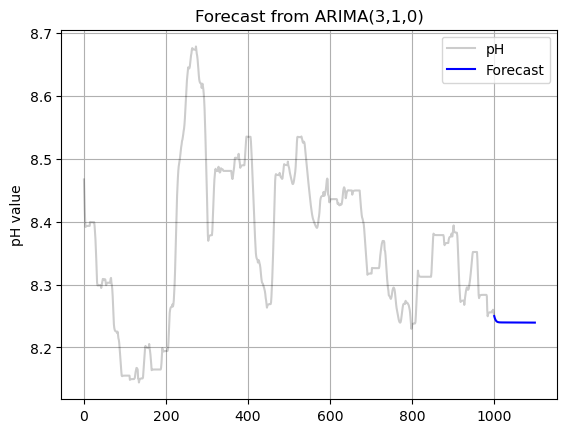

In [133]:
ffx.index = range(len(ffx))# Use a simple numeric index for plotting
ffx.plot(ylabel="pH value", title="Forecast from ARIMA(3,1,0)", color="k", alpha=0.2)
forecast = mod_can_a.get_forecast(steps=100)
# Forecast plotting (same code as before)
forecast_mean = np.exp(forecast.predicted_mean)
plt.plot(range(len(ffx), len(ffx) + 100), forecast_mean, color="b", label="Forecast")

plt.grid()
plt.legend()
plt.show()

Khuyen add Tuning Arima

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import Tuner #pip install arm-mango

data = pd.read_csv('../Pretreated data.csv')
data.head()
df = data
data_values = list(df['pH'])

In [17]:
data_values

[8.3158,
 8.3184,
 8.3198,
 8.319,
 8.3169,
 8.3139,
 8.3089,
 8.3016,
 8.2943,
 8.2885,
 8.2839,
 8.2817,
 8.2802,
 8.2785,
 8.2782,
 8.2795,
 8.2817,
 8.2848,
 8.2887,
 8.2931,
 8.2961,
 8.3019,
 8.31005,
 8.308175,
 8.3072375,
 8.30676875,
 8.306534375,
 8.306417187,
 8.306358594,
 8.306329297,
 8.306314648,
 8.306321973,
 8.306325635,
 8.306327466,
 8.30632655,
 8.306326093,
 8.306325864,
 8.306325749,
 8.306325692,
 8.306325663,
 8.3078,
 8.3108,
 8.306325649,
 8.302262825,
 8.293181412,
 8.281340706,
 8.265420353,
 8.251810177,
 8.253255088,
 8.253977544,
 8.254338772,
 8.254519386,
 8.254609693,
 8.25456454,
 8.254541963,
 8.254530674,
 8.25452503,
 8.254522208,
 8.254520797,
 8.254520092,
 8.254519739,
 8.254519562,
 8.254109781,
 8.247854891,
 8.249077445,
 8.249688723,
 8.249994361,
 8.250147181,
 8.25022359,
 8.250261795,
 8.250280898,
 8.250290449,
 8.250295224,
 8.2503,
 8.2573,
 8.2609,
 8.2649,
 8.2715,
 8.2782,
 8.2853,
 8.2918,
 8.2958,
 8.2984,
 8.2996,
 8.2985,
 8.29

In [3]:
param_space = dict(p=range(0, 30),
                   d=range(0, 30),
                   q=range(0, 30),
                   trend=['n', 'c', 't', 'ct'])


In [4]:
def arima_objective_function(args_list):
    global data_values

    params_evaluated = []
    results = []

    for params in args_list:
        try:
            p, d, q = params['p'], params['d'], params['q']
            trend = params['trend']

            # Fit the ARIMA model
            model = ARIMA(data_values, order=(p, d, q), trend=trend)
            predictions = model.fit()

            # Calculate Mean Squared Error
            mse = mean_squared_error(data_values, predictions.fittedvalues)
            params_evaluated.append(params)
            results.append(mse)
        except:
            params_evaluated.append(params)
            results.append(1e5)  # A large penalty for unsuccessful model fitting
    
    return params_evaluated, results


In [4]:
conf_Dict = dict()
conf_Dict['num_iteration'] = 12  # Change the number of iterations based on your requirements

# Initialize the Tuner
tuner = Tuner(param_space, arima_objective_function, conf_Dict)
results = tuner.minimize()


  0%|          | 0/12 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Print best parameters and the corresponding error
print('Best Parameters:', results['best_params'])
print('Best Loss:', results['best_objective'])


Final model: (10, 0, 9) ct
MSE error is: 1.0646296308477838e-05


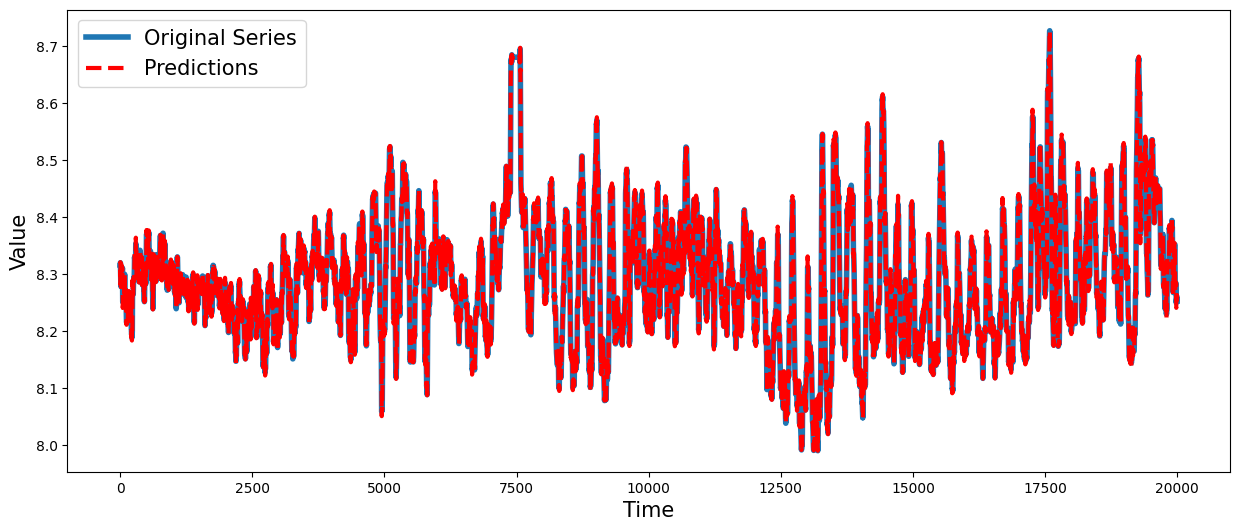

In [4]:
def plot_arima(data_values, order=(1, 1, 1), trend='c'):
    # Adjust the trend if d > 0
    if order[1] > 0 and trend == 'c':
        print("Trend 'c' is not allowed when d > 0. Changing trend to None.")
        trend = None

    print('Final model:', order, trend)
    model = ARIMA(data_values, order=order, trend=trend)
    results = model.fit()

    # Calculate Mean Squared Error
    error = mean_squared_error(data_values, results.fittedvalues)
    print('MSE error is:', error)

    # Plot the original series and predictions
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15, 6))
    plt.plot(data_values, label="Original Series", linewidth=4)
    plt.plot(results.fittedvalues, color='red', label="Predictions", linestyle='dashed', linewidth=3)
    plt.legend(fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.show()

# # Plot with the best parameters
# order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
# plot_arima(data_values, order=order, trend=results['best_params']['trend'])
#Best Parameters: {'d': 0, 'p': 10, 'q': 9, 'trend': 'ct'}

order = (10, 0, 9)
plot_arima(data_values, order=order, trend='ct')


Root Mean Squared Error (RMSE): 0.15816311657969304


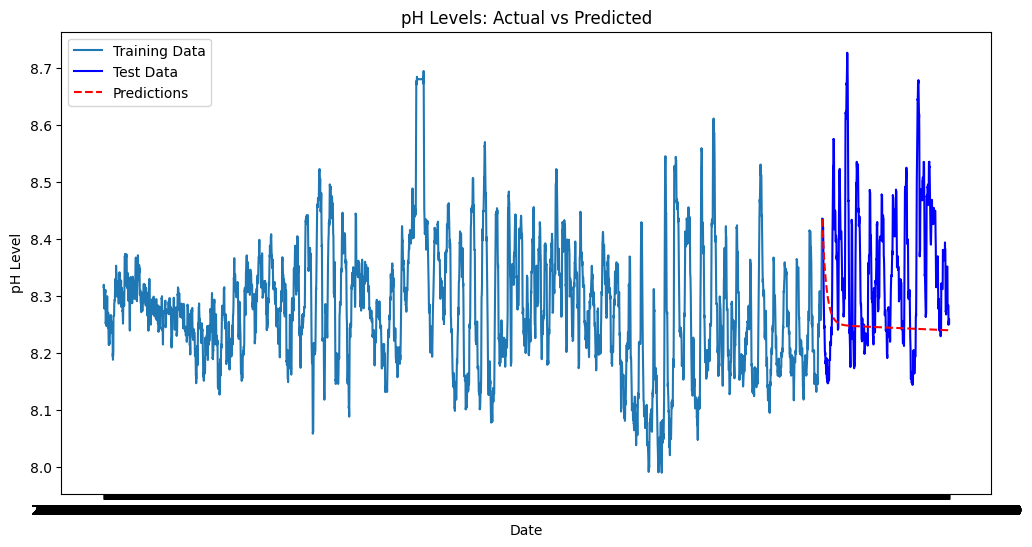

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

ph = data[['date', 'pH']]
ph = ph.set_index('date')
ph.head()

# Load and prepare the data
pH_data = ph
split_ratio = 0.85  # Split 85% for training and 15% for testing
split_point = int(len(pH_data) * split_ratio)

# Split into training and test sets
train_data, test_data = pH_data.iloc[:split_point], pH_data.iloc[split_point:]

# Fit ARIMA model to the training data
model = ARIMA(train_data, order=(10, 0, 9), trend='ct')  # Order based on previous PACF and ACF
model_fit = model.fit()

# Make predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Calculate the prediction error using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('pH Levels: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('pH Level')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import ARIMA

from sklearn.metrics import mean_squared_error
from mango import Tuner #pip install arm-mango

data = pd.read_csv('../Pretreated data.csv')
data.head()
df = data
data_values_2 = list(df['DO(mg/l)'])
def arima_objective_function_2(args_list):
    global data_values_2

    params_evaluated = []
    results = []

    for params in args_list:
        try:
            p, d, q = params['p'], params['d'], params['q']
            trend = params['trend']

            # Fit the ARIMA model
            model = ARIMA(data_values_2, order=(p, d, q), trend=trend)
            predictions = model.fit()

            # Calculate Mean Squared Error
            mse = mean_squared_error(data_values_2, predictions.fittedvalues)
            params_evaluated.append(params)
            results.append(mse)
        except:
            params_evaluated.append(params)
            results.append(1e5)  # A large penalty for unsuccessful model fitting
    
    return params_evaluated, results


e:\miniconda3\envs\SA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
param_space = dict(p=range(0, 20),
                   d=range(0, 20),
                   q=range(0, 20),
                   trend=['n', 'c', 't', 'ct'])


In [6]:
# Initialize the Tuner
conf_Dict = dict()
conf_Dict['num_iteration'] = 20  # Change the number of iterations based on your requirements


tuner_2 = Tuner(param_space, arima_objective_function_2, conf_Dict)
results_2 = tuner_2.minimize()


Best score: 0.000997873797288794: 100%|██████████| 20/20 [07:39<00:00, 22.97s/it] 


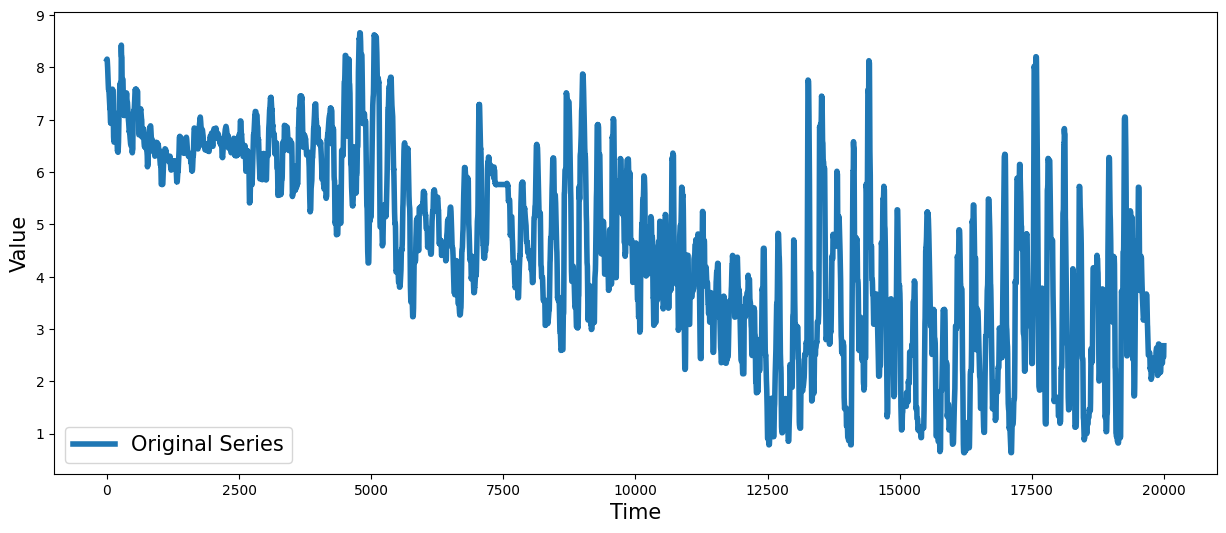

In [13]:
# Plot the original series and predictions
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data_values_2, label="Original Series", linewidth=4)
# plt.plot(results.fittedvalues, color='red', label="Predictions", linestyle='dashed', linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.show()

In [7]:
# Print best parameters and the corresponding error
print('Best Parameters:', results_2['best_params'])
print('Best Loss:', results_2['best_objective'])
# Best Parameters: {'d': 0, 'p': 0, 'q': 14, 'trend': 'n'}
# Best Loss: 0.0049307538206900285

Best Parameters: {'d': 0, 'p': 5, 'q': 12, 'trend': 'c'}
Best Loss: 0.000997873797288794


Final model: (5, 0, 12) c
MSE error is: 0.000997873797288794


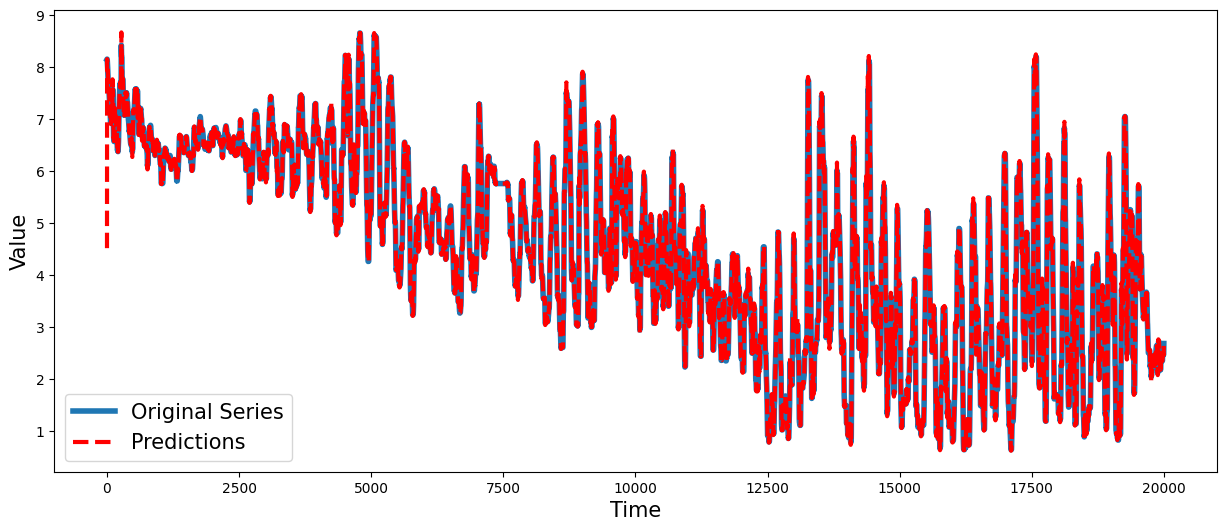

In [8]:
def plot_arima(data_values, order=(1, 1, 1), trend='c'):
    # Adjust the trend if d > 0
    if order[1] > 0 and trend == 'c':
        print("Trend 'c' is not allowed when d > 0. Changing trend to None.")
        trend = None

    print('Final model:', order, trend)
    model = ARIMA(data_values, order=order, trend=trend)
    results = model.fit()

    # Calculate Mean Squared Error
    error = mean_squared_error(data_values, results.fittedvalues)
    print('MSE error is:', error)

    # Plot the original series and predictions
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15, 6))
    plt.plot(data_values_2, label="Original Series", linewidth=4)
    plt.plot(results.fittedvalues, color='red', label="Predictions", linestyle='dashed', linewidth=3)
    plt.legend(fontsize=15)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.show()

# Plot with the best parameters
order_2 = (results_2['best_params']['p'], results_2['best_params']['d'], results_2['best_params']['q'])
plot_arima(data_values_2, order=order_2, trend=results_2['best_params']['trend'])
# Best Parameters: {'d': 0, 'p': 10, 'q': 9, 'trend': 'ct'}

# order = (10, 0, 9)
# plot_arima(data_values, order=order, trend='ct')
# Final model: (16, 0, 4) c
# MSE error is: 0.0009983235836124279

Root Mean Squared Error (RMSE): 2.2462532105225113


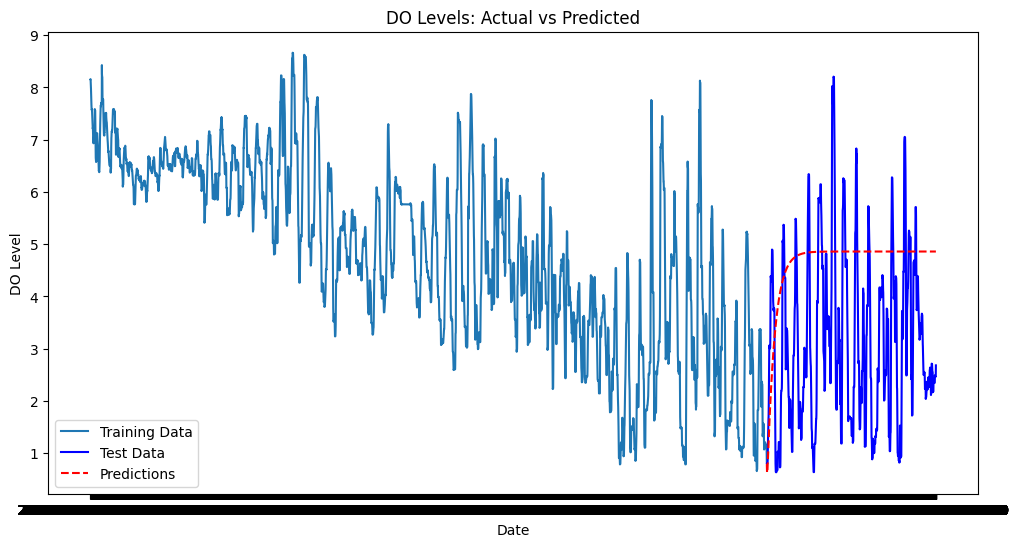

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

do = data[['date', 'DO(mg/l)']]
do = do.set_index('date')
do.head()

# Load and prepare the data
do_data = do
split_ratio = 0.80  # Split 80% for training and 20% for testing
split_point = int(len(do_data) * split_ratio)

# Split into training and test sets
train_data, test_data = do_data.iloc[:split_point], do_data.iloc[split_point:]

# Fit ARIMA model to the training data
model = ARIMA(train_data, order=order_2, trend=results_2['best_params']['trend'])  # Order based on previous PACF and ACF
model_fit = model.fit()

# Make predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Calculate the prediction error using RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the original data and predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, predictions, label='Predictions', color='red', linestyle='--')
plt.title('DO Levels: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('DO Level')
plt.legend()
plt.show()
